In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_excel("ISP_Fox_PrePeriPost_Menopause.xlsx")

In [3]:
df.head(3)

,fox_insight_id,age,days_elapsed,days_acquired,schedule_of_activities,FemMenoSex,FemMenoGender,FemMenoPDDiag,FemMenoDiagPerio,FemMenoDiagPreg,...,FemMenoPostPDChDryMouth,FemMenoPostPDChNausea,FemMenoPostPDChSexual,FemMenoPostPDChSmell,FemMenoPostPDChTaste,FemMenoPostPDChPain,FemMenoPostPDChTingling,FemMenoPostPDChSpeech,FemMenoPostPDChVision,FemMenoConception
0,FOX_000087,67.8,24753,0,54,2,2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,FOX_000640,64.8,23662,0,59,2,2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0
2,FOX_001148,67.1,24469,0,REG,2,2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Priority #1: How are motor symptoms impacted by menopause?

#### PREMENOPAUSAL: 
- Did you notice a change in your Parkinson’s symptoms when using a hormonal birth control device or pills? 
- Did you notice any improvement in your Parkinson’s symptoms (motor and non-motor) when using a hormonal birth control device or pills? 
- Have you noticed that your Parkinson’s symptoms change in relationship to your menstrual cycle? 
- During what phase of your menstrual cycle do your Parkinson’s symptoms change? Select all that apply
- Do you notice that your Parkinson’s symptoms change around the time of ovulation? 
- Which Parkinson’s movement symptoms change during your period? 
    - How do these symptoms change during your period?

#### PERIMENOPAUSAL: 
- Have you experienced changes to your Parkinson’s symptoms during perimenopause? 
- Which Parkinson’s movement symptoms change during perimenopause?
    - How do you feel these symptoms have changed during perimenopause? 

#### POSTMENOPAUSAL: 
- Which Parkinson’s movement symptoms do you experience now? 
    - Please select how these symptoms changed after menopause.

In [4]:
print('AFAB respondents:',len(df[df['FemMenoSex'] == 2]))
print('AMAB respondents:',len(df[df['FemMenoSex'] == 1]))
print('Prefer not to answer:',len(df[df['FemMenoSex'] == 3]))

AFAB respondents: 3094
AMAB respondents: 293
Prefer not to answer: 3


In [5]:
print('Cis-female respondents:',len(df[(df['FemMenoSex'] == 2) & (df['FemMenoGender'] == 2)]))
print('AFAB gender-queer respondents:',len(df[(df['FemMenoSex'] == 2) & (df['FemMenoGender'] == 5)]))
print('AFAB + "not sure" respondents:',len(df[(df['FemMenoSex'] == 2) & (df['FemMenoGender'] == 6)]))
print('AFAB + "prefer not to answer" respondents:',len(df[(df['FemMenoSex'] == 2) & (df['FemMenoGender'] == 7)]))
print('Cis-male respondents:',len(df[(df['FemMenoSex'] == 1) & (df['FemMenoGender'] == 1)]))

Cis-female respondents: 3089
AFAB gender-queer respondents: 1
AFAB + "not sure" respondents: 1
AFAB + "prefer not to answer" respondents: 3
Cis-male respondents: 293


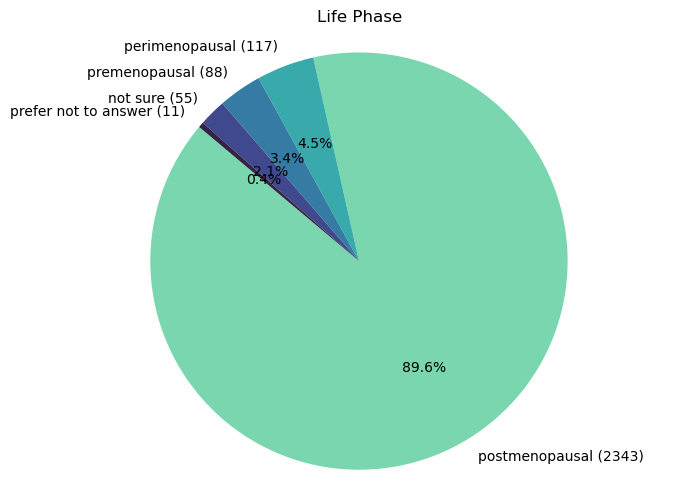

In [6]:
# Responses to questions about menopause
phase_counts = df[df['FemMenoSex'] == 2]['FemMenoLifePhase'].value_counts()
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['postmenopausal','perimenopausal','premenopausal','not sure','prefer not to answer'], phase_counts)]
plt.pie(phase_counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=sns.color_palette("mako", len(phase_counts))[::-1])
plt.title('Life Phase')
plt.axis('equal')
plt.show()

## Premenopausal

In [7]:
# Number of AFAB premenopausal respondents
print('N='+str(len(df[(df['FemMenoSex'] == 2) & (df['FemMenoLifePhase'] == 1)])))

N=88


In [8]:
# Did you notice a change in your Parkinson’s symptoms when using a hormonal birth control device or pills?
bcever = len(df[df['FemMenoPreBCEver'] == 1])
resp = df[df['FemMenoPreBCEver'] == 1]['FemMenoPreBCPDSympCh'].value_counts()
print("Of",bcever,"respondents who said they have taken birth control,",
      resp[1.0],"said that they noticed a change in their Parkinson's symptoms and",
      resp[3.0],"answered not applicable.")
print('All participants who answered the question were premenopausal.')

Of 77 respondents who said they have taken birth control, 4 said that they noticed a change in their Parkinson's symptoms and 1 answered not applicable.
All participants who answered the question were premenopausal.


In [9]:
# Did you notice any improvement in your Parkinson’s symptoms (motor and non-motor) when using a hormonal birth control device or pills? 
resp = df[df['FemMenoPreBCEver'] == 1]['FemMenoPreBCPDSympIm'].value_counts()
print("Of",bcever,"respondents who said they have taken birth control,",
      resp[1.0],"said that they noticed an improvement in their Parkinson's symptoms and",
      resp[3.0],"answered not applicable.")
print('All participants who answered the question were premenopausal.')

Of 77 respondents who said they have taken birth control, 4 said that they noticed an improvement in their Parkinson's symptoms and 1 answered not applicable.
All participants who answered the question were premenopausal.


In [10]:
# Have you noticed that your Parkinson’s symptoms change in relationship to your menstrual cycle?
resp = df['FemMenoPreSympChRel'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"said that they noticed a consistent or predictable change in their Parkinson's symptoms,",
      resp[2.0],"said that they noticed an inconsistent or unpredictable change,",
      resp[3.0],"answered no, and",
      resp[4.0],"answered unsure.")

Of 88 respondents who answered the question, 33 said that they noticed a consistent or predictable change in their Parkinson's symptoms, 15 said that they noticed an inconsistent or unpredictable change, 18 answered no, and 22 answered unsure.


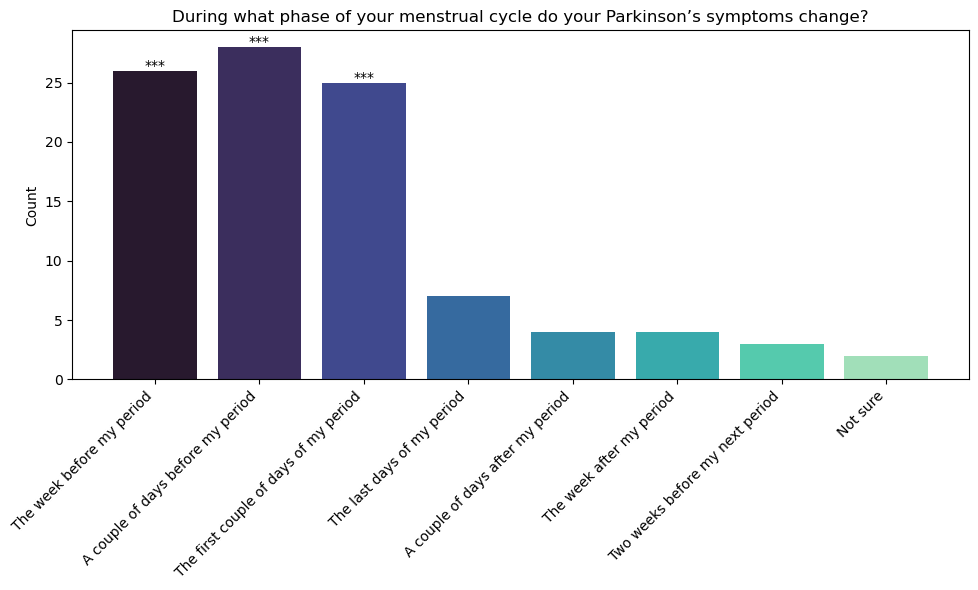

48 respondents answered the question



In [11]:
# During what phase of your menstrual cycle do your Parkinson’s symptoms change? Select all that apply
menstrual_cycle_Qs = [
    'FemMenoPreSympChWeekBe',
    'FemMenoPreSympChDaysBe',
    'FemMenoPreSympCh1stDays',
    'FemMenoPreSympChLastDays',
    'FemMenoPreSympChDaysAf',
    'FemMenoPreSympChWeekAf',
    'FemMenoPreSympCh2WeekBe',
    'FemMenoPreSympChNotSure'
]

cycle_df = df[(df[menstrual_cycle_Qs] == 1).any(axis=1)]
menstrual_cycle_As = cycle_df[menstrual_cycle_Qs].sum()

menstrual_cycle_labels = [
    'The week before my period',
    'A couple of days before my period',
    'The first couple of days of my period',
    'The last days of my period',
    'A couple of days after my period',
    'The week after my period',
    'Two weeks before my next period',
    'Not sure'
]

plt.figure(figsize=(10, 6))
bars = plt.bar(menstrual_cycle_labels, menstrual_cycle_As, color=sns.color_palette("mako", len(menstrual_cycle_Qs)))
plt.ylabel('Count')
plt.title('During what phase of your menstrual cycle do your Parkinson’s symptoms change?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# chi-square test for each question
contingency_table = pd.DataFrame(index=menstrual_cycle_labels)
p_values = []
for i, q in enumerate(menstrual_cycle_Qs):
    counts = df[q].value_counts()
    contingency_table.loc[menstrual_cycle_labels[i],'Yes'] = counts[1.0]
    contingency_table.loc[menstrual_cycle_labels[i],'No'] = len(cycle_df) - counts[1.0]

ct = contingency_table.to_numpy()

num_rows = ct.shape[0]
p_values = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        chi2, p, dof, expected = chi2_contingency(np.array([ct[i], ct[j]]))
        p_values[i, j] = p

# plotting these as p<0.05 = '*' p<0.01 = '**' p<0.001 = '***'
p_values_plot = [3,3,3,0,0,0,0,0]
for i, bar in enumerate(bars):
    significance_star = ''
    for level in np.arange(4):
        if p_values_plot[i] > level:
            significance_star += '*'
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, significance_star, ha='center', va='top')

plt.show()

print(f"{len(cycle_df)} respondents answered the question\n")

In [12]:
# Print p-values
for i in range(len(p_values)):
    for j in range(i+1, len(p_values)):
        if p_values[i, j] < 0.05:
            print(f"{menstrual_cycle_labels[i]} vs row {menstrual_cycle_labels[j]}: {p_values[i, j]}")

The week before my period vs row The last days of my period: 0.00010975405942892536
The week before my period vs row A couple of days after my period: 3.7632306090173225e-06
The week before my period vs row The week after my period: 3.7632306090173225e-06
The week before my period vs row Two weeks before my next period: 1.00760802059467e-06
The week before my period vs row Not sure: 2.4105644381955353e-07
A couple of days before my period vs row The last days of my period: 2.2254162916437977e-05
A couple of days before my period vs row A couple of days after my period: 6.370065893774609e-07
A couple of days before my period vs row The week after my period: 6.370065893774609e-07
A couple of days before my period vs row Two weeks before my next period: 1.6186175060422758e-07
A couple of days before my period vs row Not sure: 3.695481094035068e-08
The first couple of days of my period vs row The last days of my period: 0.00023267851145308154
The first couple of days of my period vs row A 

In [13]:
# Do you notice that your Parkinson’s symptoms change around the time of ovulation?
resp = df['FemMenoPreSympChOvul'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],f"({round(resp[1.0]/resp.sum()*100,2)}%)","answered yes,",
      resp[2.0],f"({round(resp[2.0]/resp.sum()*100,2)}%)","answered sometimes,",
      resp[3.0],f"({round(resp[3.0]/resp.sum()*100,2)}%)","answered no, and",
      resp[4.0],f"({round(resp[4.0]/resp.sum()*100,2)}%)","answered not sure.")

Of 48 respondents who answered the question, 10 (20.83%) answered yes, 11 (22.92%) answered sometimes, 8 (16.67%) answered no, and 19 (39.58%) answered not sure.


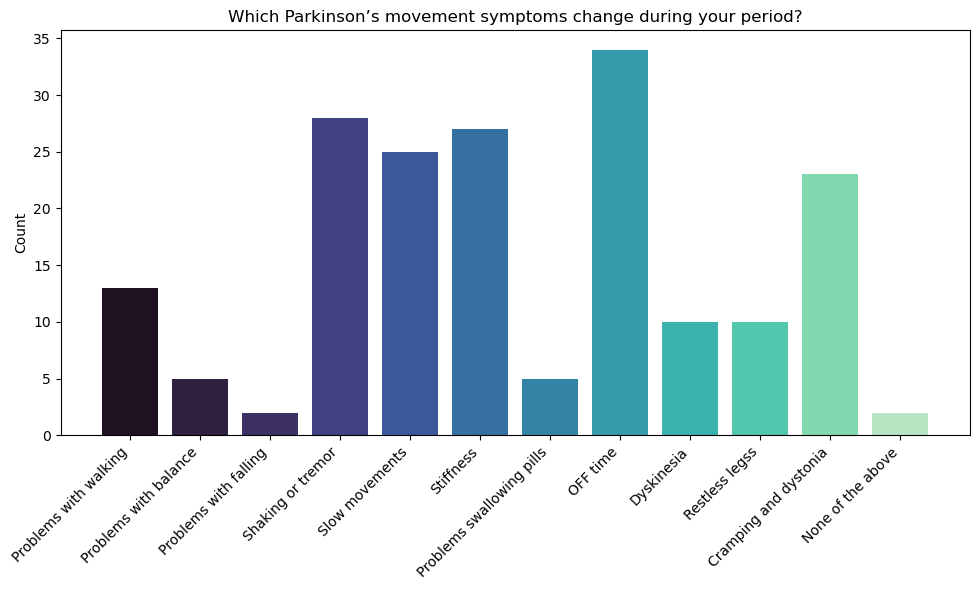

48 respondents answered the question



In [14]:
# Which Parkinson’s movement symptoms change during your period?
motor_Qs = [
    'FemMenoPrePDWalking',
    'FemMenoPrePDBalance',
    'FemMenoPrePDFalling',
    'FemMenoPrePDTremor',
    'FemMenoPrePDSlowMove',
    'FemMenoPrePDStiff',
    'FemMenoPrePDSwallowing',
    'FemMenoPrePDOFFTime',
    'FemMenoPrePDDyskinesia',
    'FemMenoPrePDResLeg',
    'FemMenoPrePDDystonia',
    'FemMenoPrePDNoneMov'
]

motor_df = df[(df[motor_Qs] == 1).any(axis=1)]
motor_As = motor_df[motor_Qs].sum()

motor_labels = [
    'Problems with walking',
    'Problems with balance',
    'Problems with falling',
    'Shaking or tremor',
    'Slow movements',
    'Stiffness',
    'Problems swallowing pills',
    'OFF time',
    'Dyskinesia',
    'Restless legss',
    'Cramping and dystonia',
    'None of the above'
]

plt.figure(figsize=(10, 6))
bars = plt.bar(motor_labels, motor_As, color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('Which Parkinson’s movement symptoms change during your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# chi-square test for each question
contingency_table = pd.DataFrame(index=motor_labels)
p_values = []
for i, q in enumerate(motor_Qs):
    counts = df[q].value_counts()
    contingency_table.loc[motor_labels[i],'Yes'] = counts[1.0]
    contingency_table.loc[motor_labels[i],'No'] = len(motor_df) - counts[1.0]

ct = contingency_table.to_numpy()

num_rows = ct.shape[0]
p_values = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        chi2, p, dof, expected = chi2_contingency(np.array([ct[i], ct[j]]))
        p_values[i, j] = p


print(f"{len(motor_df)} respondents answered the question\n")

In [15]:
# Print p-values -- harder to figure out how to display significance labels for these, let's discuss!
for i in range(len(p_values)):
    for j in range(i+1, len(p_values)):
        if p_values[i, j] < 0.05:
            print(f"{motor_labels[i]} vs row {motor_labels[j]}: {p_values[i, j]}")

Problems with walking vs row Problems with falling: 0.0049401068841213305
Problems with walking vs row Shaking or tremor: 0.0038693664324626906
Problems with walking vs row Slow movements: 0.021690810768262184
Problems with walking vs row Stiffness: 0.007118361627353116
Problems with walking vs row OFF time: 4.438742757816426e-05
Problems with walking vs row None of the above: 0.0049401068841213305
Problems with balance vs row Shaking or tremor: 2.2730697014491905e-06
Problems with balance vs row Slow movements: 2.8685011953474866e-05
Problems with balance vs row Stiffness: 5.451083259025127e-06
Problems with balance vs row OFF time: 5.931681185331796e-09
Problems with balance vs row Cramping and dystonia: 0.00013494519269682717
Problems with falling vs row Shaking or tremor: 3.695481094035068e-08
Problems with falling vs row Slow movements: 5.912965944010564e-07
Problems with falling vs row Stiffness: 9.569969533862339e-08
Problems with falling vs row OFF time: 6.345085259611319e-11
P

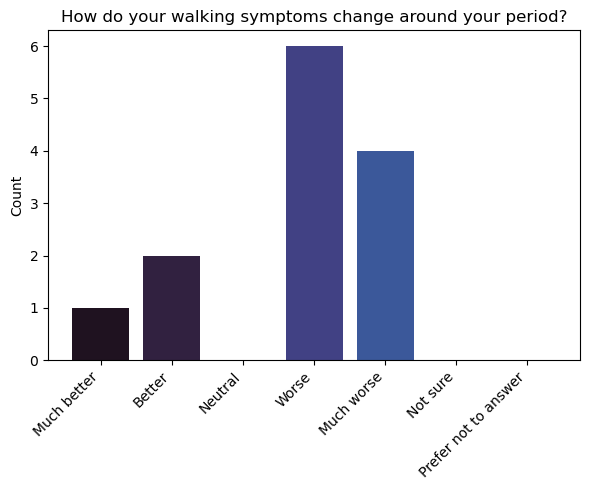

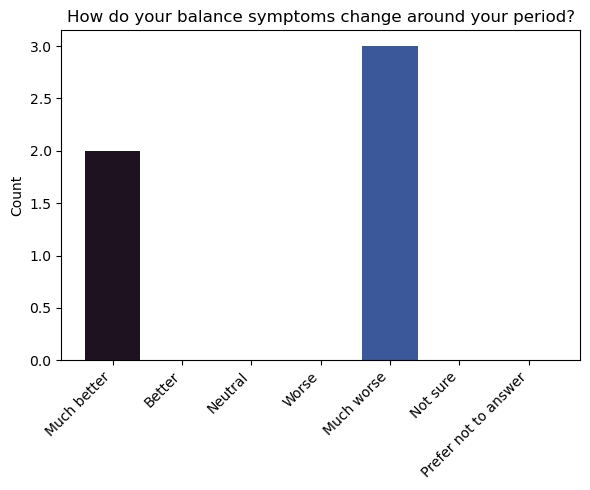

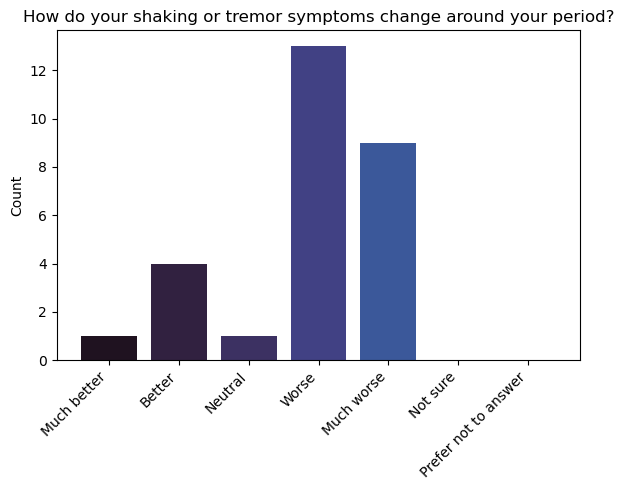

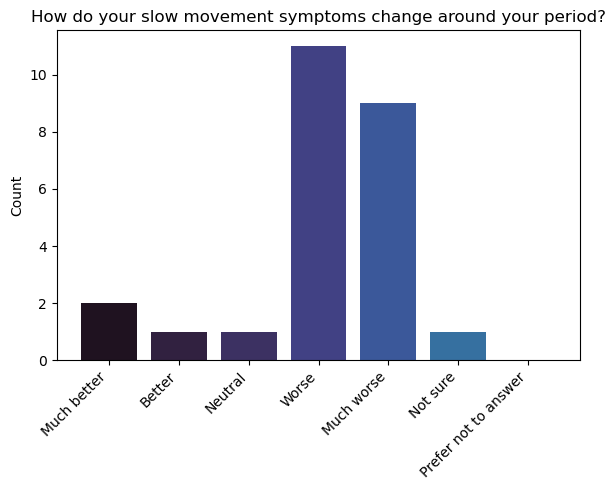

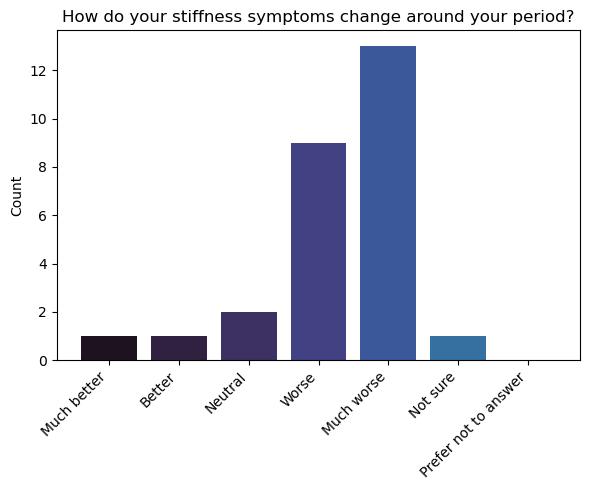

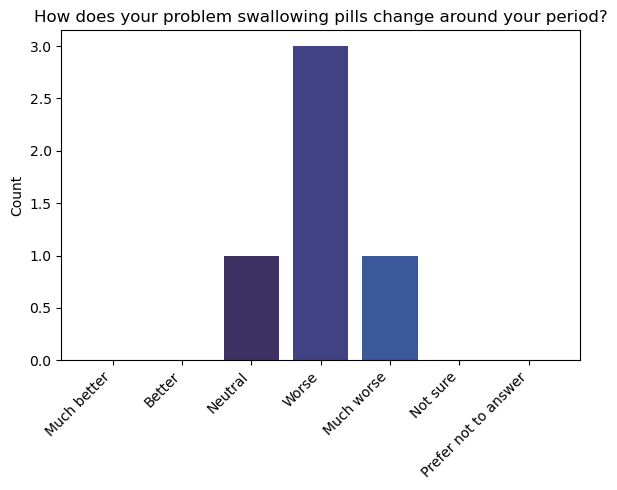

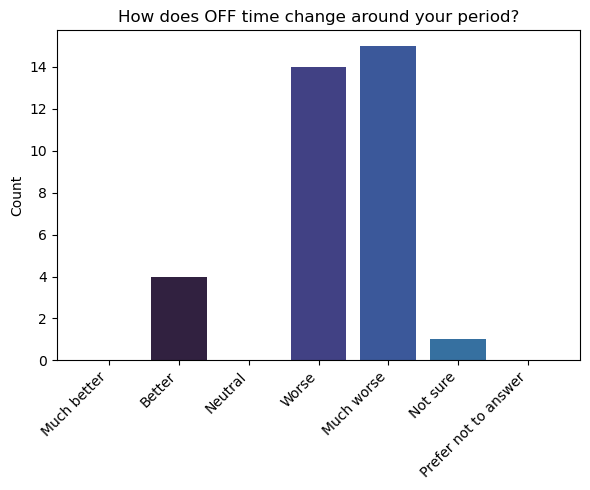

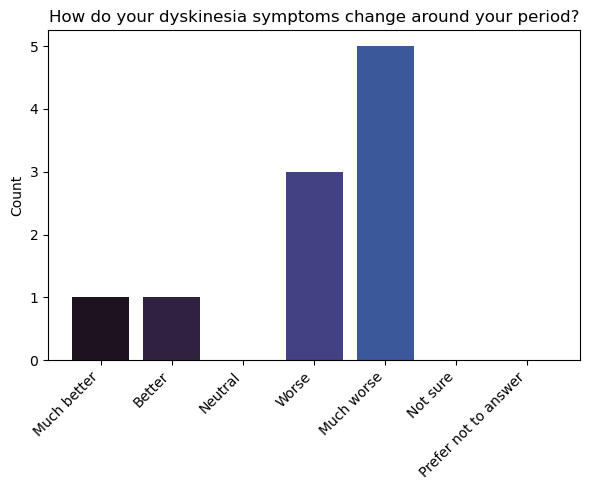

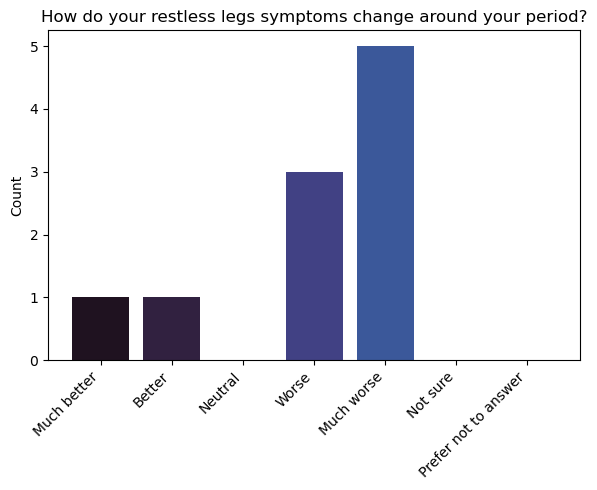

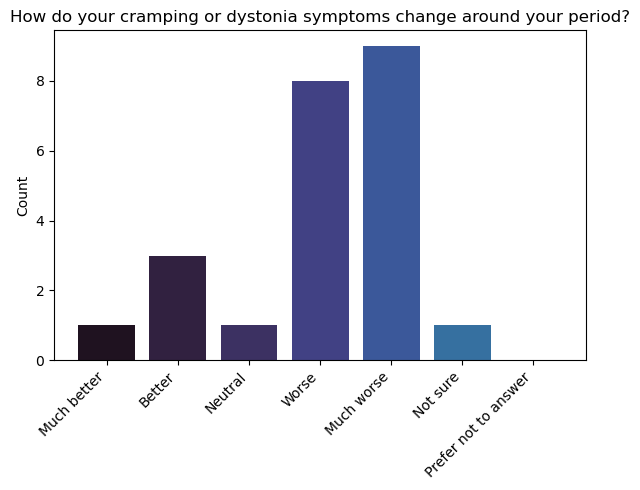

In [16]:
# How do these symptoms change during your period?

# Walking
walking = df.FemMenoPrePDChWalking.value_counts()

resp_key = {
    'Much better': 1.0,
    'Better': 2.0,
    'Neutral': 3.0,
    'Worse': 4.0,
    'Much worse': 5.0,
    'Not sure': 6.0,
    'Prefer not to answer': 7.0
}

walking_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        walking_plt[key] = walking[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(walking_plt.keys()), list(walking_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your walking symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Balance
balance = df.FemMenoPrePDChBalance.value_counts()

balance_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        balance_plt[key] = balance[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(balance_plt.keys()), list(balance_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your balance symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Shaking or tremor
tremor = df.FemMenoPrePDChTremor.value_counts()

tremor_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        tremor_plt[key] = tremor[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(tremor_plt.keys()), list(tremor_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your shaking or tremor symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Slow movements
mvmnts = df.FemMenoPrePDChSlowMove.value_counts()

mvmnts_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        mvmnts_plt[key] = mvmnts[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(mvmnts_plt.keys()), list(mvmnts_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your slow movement symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Stiffness
stiffness = df.FemMenoPrePDChStiff.value_counts()

stiffness_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        stiffness_plt[key] = stiffness[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(stiffness_plt.keys()), list(stiffness_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your stiffness symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Swallowing
swallowing = df.FemMenoPrePDChSwallowing.value_counts()

swallowing_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        swallowing_plt[key] = swallowing[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(swallowing_plt.keys()), list(swallowing_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How does your problem swallowing pills change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# OFF time
off_time = df.FemMenoPrePDChOFFTime.value_counts()

off_time_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        off_time_plt[key] = off_time[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(off_time_plt.keys()), list(off_time_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How does OFF time change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Dyskinesia
dyskinesia = df.FemMenoPrePDChDyskinesia.value_counts()

dyskinesia_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        dyskinesia_plt[key] = dyskinesia[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your dyskinesia symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Restless legs
restless = df.FemMenoPrePDChResLeg.value_counts()

restless_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        restless_plt[key] = restless[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your restless legs symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Cramping and dystonia
cramping = df.FemMenoPrePDChDystonia.value_counts()

cramping_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        cramping_plt[key] = cramping[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(cramping_plt.keys()), list(cramping_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How do your cramping or dystonia symptoms change around your period?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Perimenopausal

In [17]:
# Have you experienced changes to your Parkinson’s symptoms during perimenopause?
resp = df['FemMenoPeriPDExpCh'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"said that they experienced changes in their Parkinson's symptoms during perimenopause,",
      resp[2.0],"said that they did not, and",
      resp[3.0],"answered unsure.")

Of 117 respondents who answered the question, 51 said that they experienced changes in their Parkinson's symptoms during perimenopause, 22 said that they did not, and 44 answered unsure.


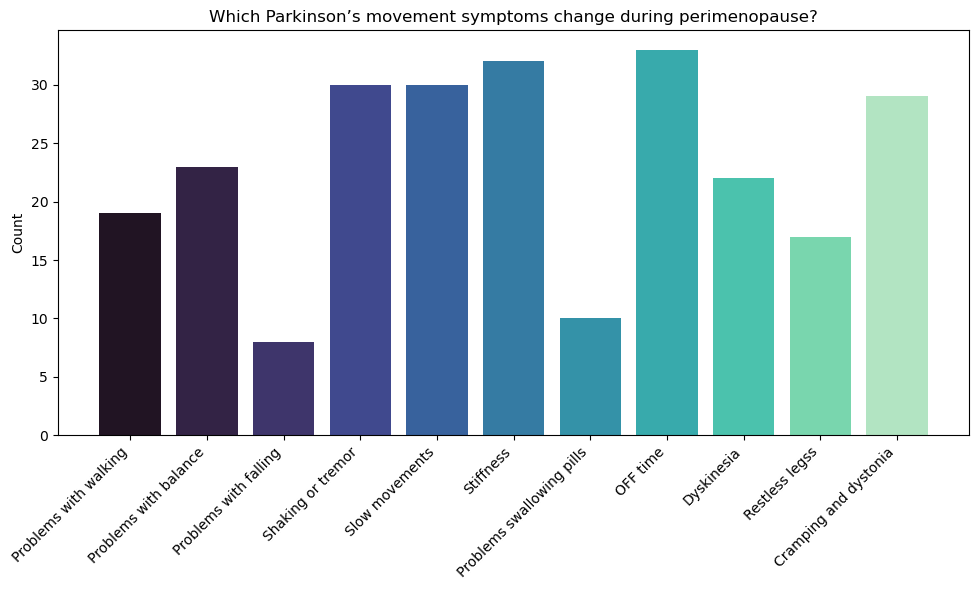

51 respondents answered the question



In [18]:
# Which Parkinson’s movement symptoms change during perimenopause?

motor_Qs = [
    'FemMenoPeriPDWalking',
    'FemMenoPeriPDBalance',
    'FemMenoPeriPDFalling',
    'FemMenoPeriPDTremor',
    'FemMenoPeriPDSlowMove',
    'FemMenoPeriPDStiff',
    'FemMenoPeriPDSwallowing',
    'FemMenoPeriPDOFFTime',
    'FemMenoPeriPDDyskinesia',
    'FemMenoPeriPDResLegs',
    'FemMenoPeriPDDystonia'
]

motor_df = df[(df[motor_Qs] == 1).any(axis=1)]
motor_As = motor_df[motor_Qs].sum()

motor_labels = [
    'Problems with walking',
    'Problems with balance',
    'Problems with falling',
    'Shaking or tremor',
    'Slow movements',
    'Stiffness',
    'Problems swallowing pills',
    'OFF time',
    'Dyskinesia',
    'Restless legss',
    'Cramping and dystonia'
]

plt.figure(figsize=(10, 6))
bars = plt.bar(motor_labels, motor_As, color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('Which Parkinson’s movement symptoms change during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# chi-square test for each question
contingency_table = pd.DataFrame(index=motor_labels)
p_values = []
for i, q in enumerate(motor_Qs):
    counts = df[q].value_counts()
    contingency_table.loc[motor_labels[i],'Yes'] = counts[1.0]
    contingency_table.loc[motor_labels[i],'No'] = len(motor_df) - counts[1.0]

ct = contingency_table.to_numpy()

num_rows = ct.shape[0]
p_values = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        chi2, p, dof, expected = chi2_contingency(np.array([ct[i], ct[j]]))
        p_values[i, j] = p


print(f"{len(motor_df)} respondents answered the question\n")

In [19]:
# Print p-values -- harder to figure out how to display significance labels for these, let's discuss!
for i in range(len(p_values)):
    for j in range(i+1, len(p_values)):
        if p_values[i, j] < 0.05:
            print(f"{motor_labels[i]} vs row {motor_labels[j]}: {p_values[i, j]}")

Problems with walking vs row Problems with falling: 0.024810891831898472
Problems with walking vs row Shaking or tremor: 0.04749943915052824
Problems with walking vs row Slow movements: 0.04749943915052824
Problems with walking vs row Stiffness: 0.017484674410521348
Problems with walking vs row OFF time: 0.010027526446317957
Problems with balance vs row Problems with falling: 0.002579761570408873
Problems with balance vs row Problems swallowing pills: 0.011091532307766005
Problems with falling vs row Shaking or tremor: 1.702712498458613e-05
Problems with falling vs row Slow movements: 1.702712498458613e-05
Problems with falling vs row Stiffness: 3.094170646153832e-06
Problems with falling vs row OFF time: 1.2547315643673755e-06
Problems with falling vs row Dyskinesia: 0.004728242974012971
Problems with falling vs row Cramping and dystonia: 3.808217213086904e-05
Shaking or tremor vs row Problems swallowing pills: 0.00011655748356289878
Shaking or tremor vs row Restless legss: 0.01713970

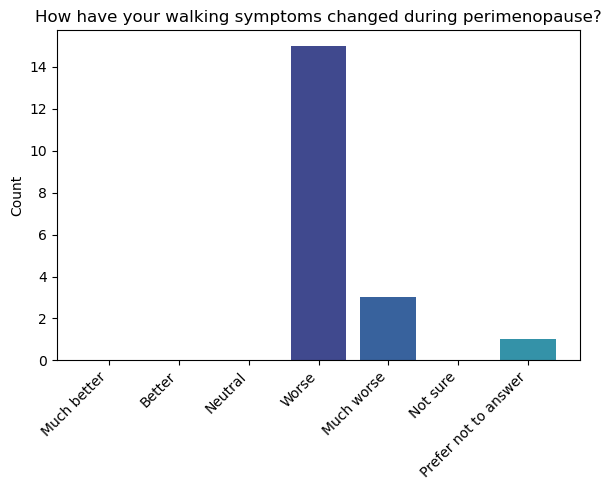

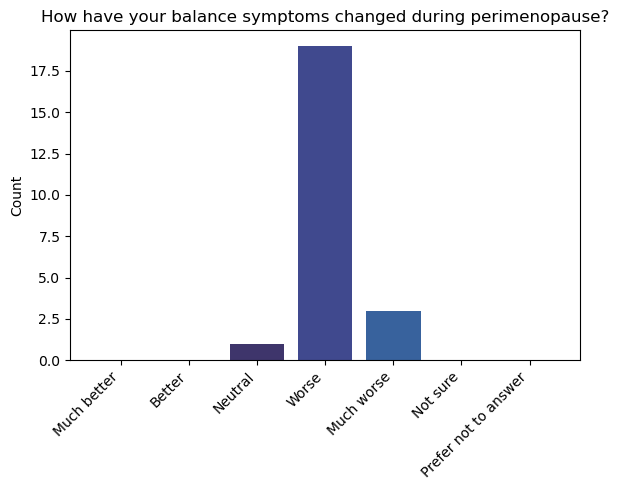

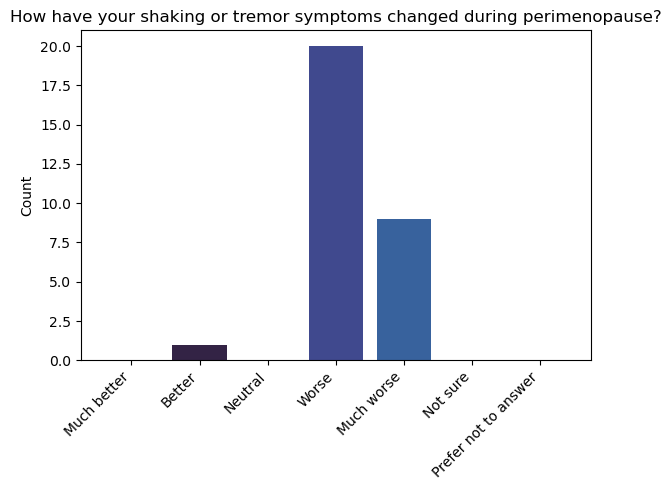

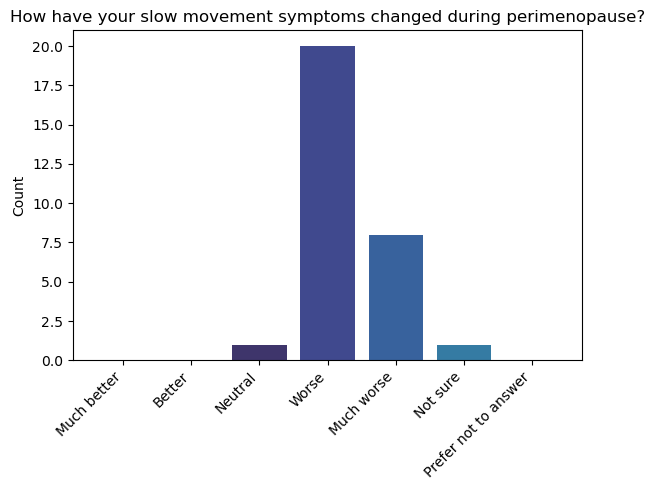

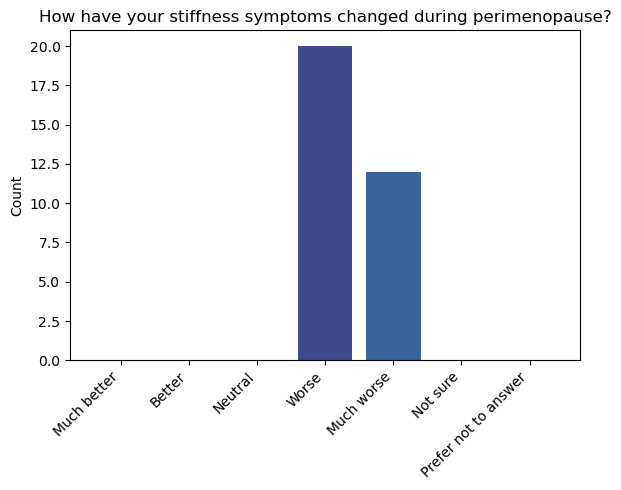

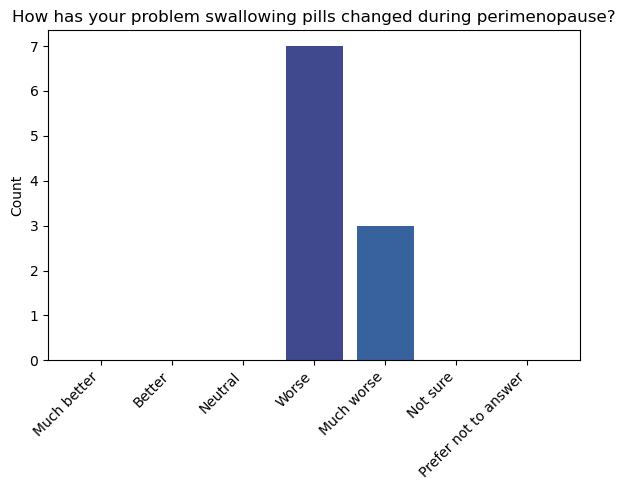

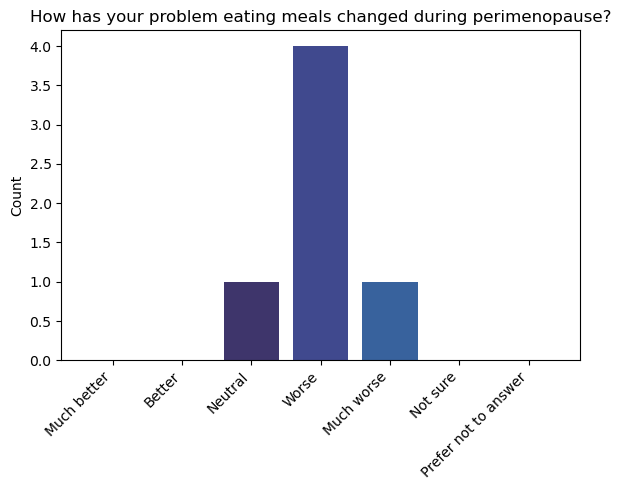

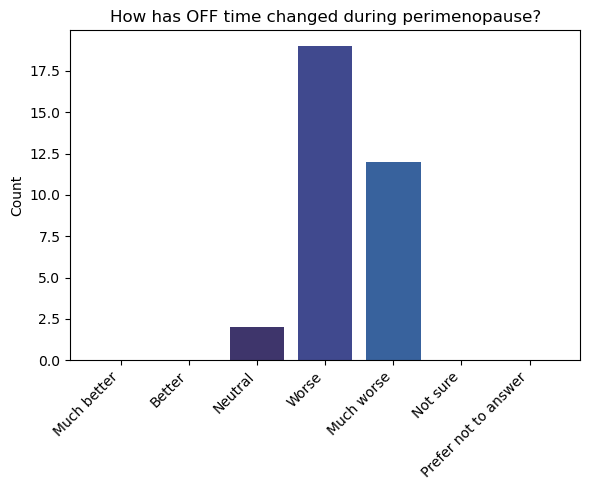

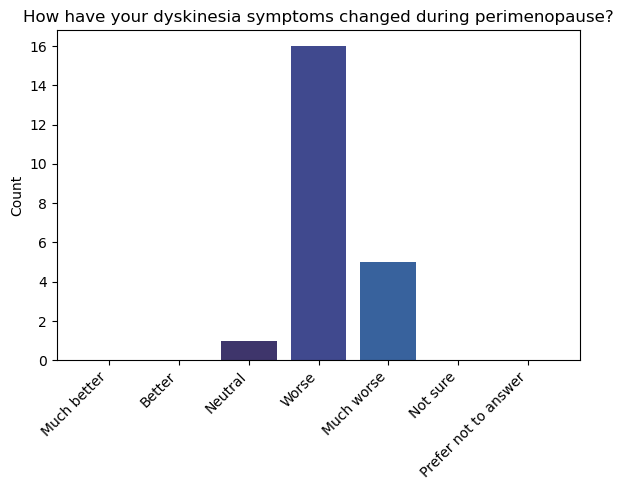

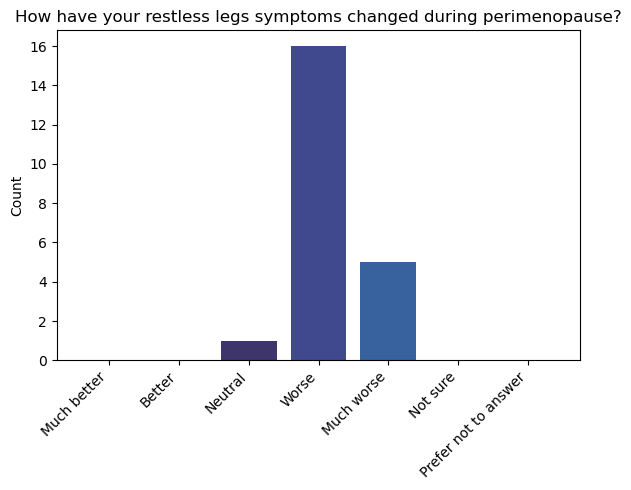

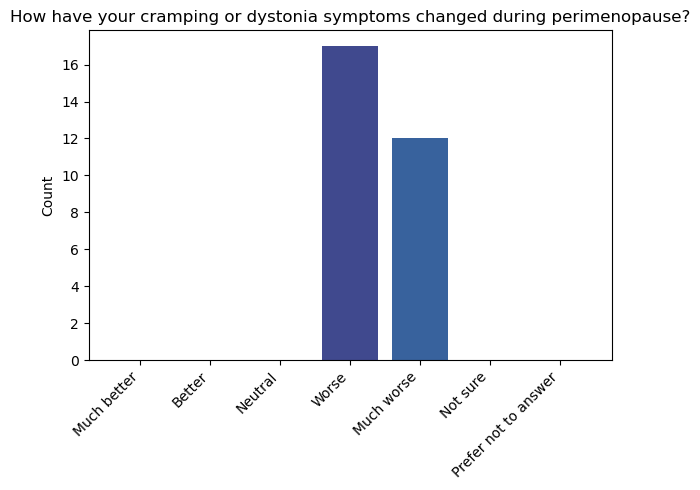

In [20]:
# How do you feel these symptoms have changed during perimenopause?

# Walking
walking = df.FemMenoPeriPDChWalking.value_counts()

resp_key = {
    'Much better': 1.0,
    'Better': 2.0,
    'Neutral': 3.0,
    'Worse': 4.0,
    'Much worse': 5.0,
    'Not sure': 6.0,
    'Prefer not to answer': 7.0
}

walking_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        walking_plt[key] = walking[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(walking_plt.keys()), list(walking_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your walking symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Balance
balance = df.FemMenoPeriPDChBalance.value_counts()

balance_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        balance_plt[key] = balance[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(balance_plt.keys()), list(balance_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your balance symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Shaking or tremor
tremor = df.FemMenoPeriPDChTremor.value_counts()

tremor_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        tremor_plt[key] = tremor[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(tremor_plt.keys()), list(tremor_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your shaking or tremor symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Slow movements
mvmnts = df.FemMenoPeriPDChSlowMove.value_counts()

mvmnts_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        mvmnts_plt[key] = mvmnts[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(mvmnts_plt.keys()), list(mvmnts_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your slow movement symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Stiffness
stiffness = df.FemMenoPeriPDChStiff.value_counts()

stiffness_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        stiffness_plt[key] = stiffness[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(stiffness_plt.keys()), list(stiffness_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your stiffness symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Swallowing
swallowing = df.FemMenoPeriPDChSwallowing.value_counts()

swallowing_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        swallowing_plt[key] = swallowing[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(swallowing_plt.keys()), list(swallowing_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has your problem swallowing pills changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Eating
eating = df.FemMenoPeriPDChEating.value_counts()

eating_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        eating_plt[key] = eating[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(eating_plt.keys()), list(eating_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has your problem eating meals changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# OFF time
off_time = df.FemMenoPeriPDChOFFTime.value_counts()

off_time_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        off_time_plt[key] = off_time[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(off_time_plt.keys()), list(off_time_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has OFF time changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Dyskinesia
dyskinesia = df.FemMenoPeriPDChDyskinesia.value_counts()

dyskinesia_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        dyskinesia_plt[key] = dyskinesia[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your dyskinesia symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Restless legs
restless = df.FemMenoPeriPDChResLeg.value_counts()

restless_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        restless_plt[key] = restless[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your restless legs symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Cramping and dystonia
cramping = df.FemMenoPeriPDChDystonia.value_counts()

cramping_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        cramping_plt[key] = cramping[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(cramping_plt.keys()), list(cramping_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your cramping or dystonia symptoms changed during perimenopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Postmenopausal

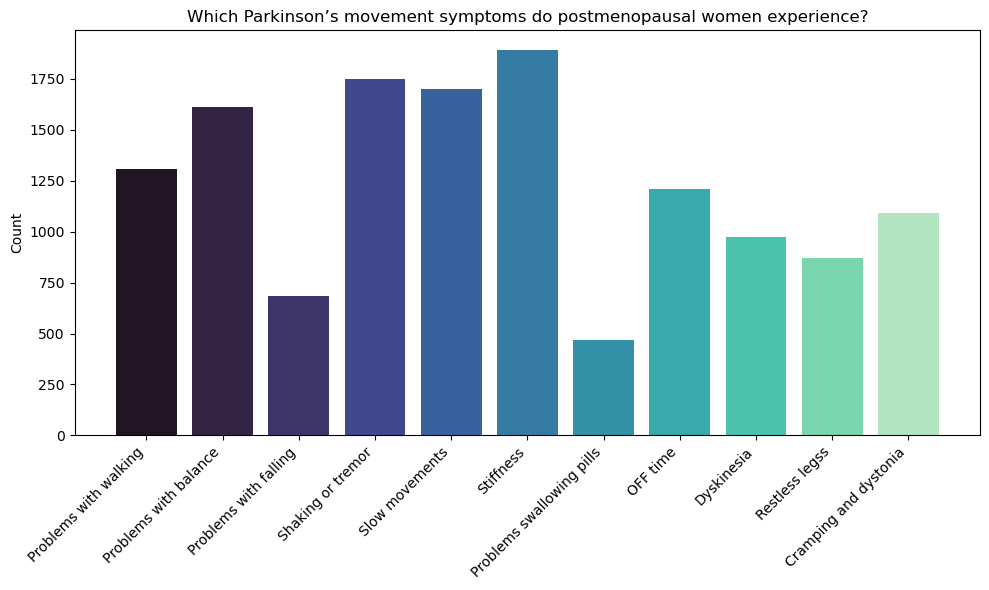

2762 respondents answered the question



In [21]:
# Which Parkinson’s movement symptoms do you experience now?

motor_Qs = [
    'FemMenoPostPDWalking',
    'FemMenoPostPDBalance',
    'FemMenoPostPDFalling',
    'FemMenoPostPDTremor',
    'FemMenoPostPDSlowMove',
    'FemMenoPostPDStiff',
    'FemMenoPostPDSwallowing',
    'FemMenoPostPDOFFTime',
    'FemMenoPostPDDyskinesia',
    'FemMenoPostPDResLeg',
    'FemMenoPostPDDystonia'
]

motor_df = df[(df[motor_Qs] == 1).any(axis=1)]
motor_As = motor_df[motor_Qs].sum()

motor_labels = [
    'Problems with walking',
    'Problems with balance',
    'Problems with falling',
    'Shaking or tremor',
    'Slow movements',
    'Stiffness',
    'Problems swallowing pills',
    'OFF time',
    'Dyskinesia',
    'Restless legss',
    'Cramping and dystonia'
]

plt.figure(figsize=(10, 6))
bars = plt.bar(motor_labels, motor_As, color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('Which Parkinson’s movement symptoms do postmenopausal women experience?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# chi-square test for each question
contingency_table = pd.DataFrame(index=motor_labels)
p_values = []
for i, q in enumerate(motor_Qs):
    counts = df[q].value_counts()
    contingency_table.loc[motor_labels[i],'Yes'] = counts[1.0]
    contingency_table.loc[motor_labels[i],'No'] = len(motor_df) - counts[1.0]

ct = contingency_table.to_numpy()

num_rows = ct.shape[0]
p_values = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        chi2, p, dof, expected = chi2_contingency(np.array([ct[i], ct[j]]))
        p_values[i, j] = p


print(f"{len(motor_df)} respondents answered the question\n")

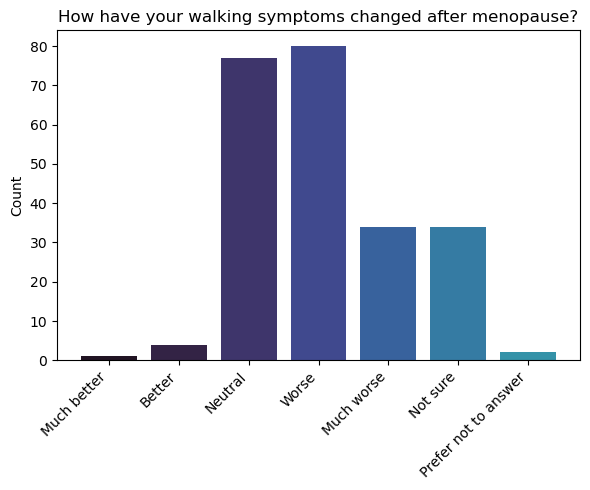

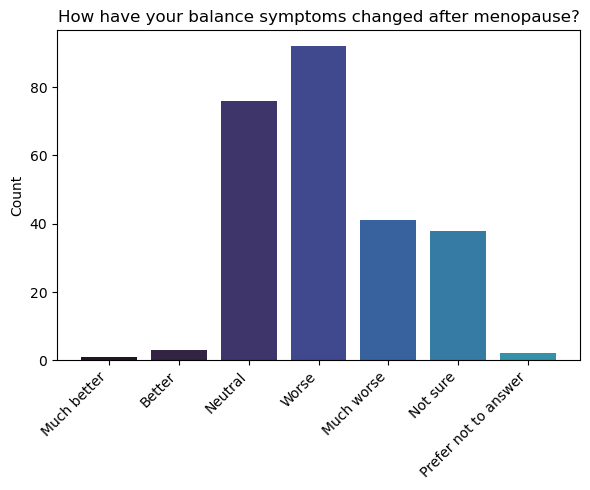

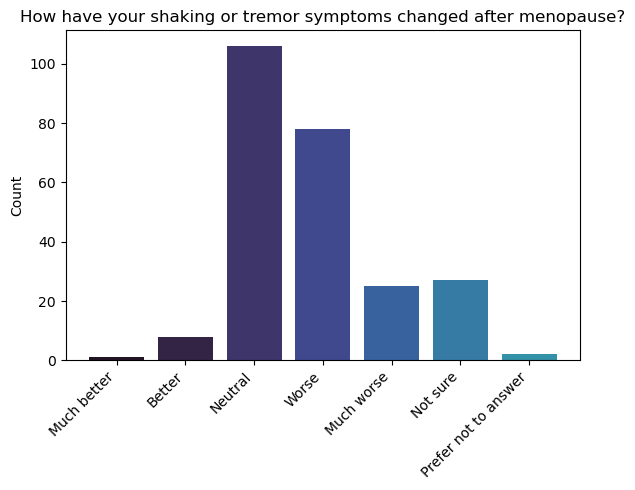

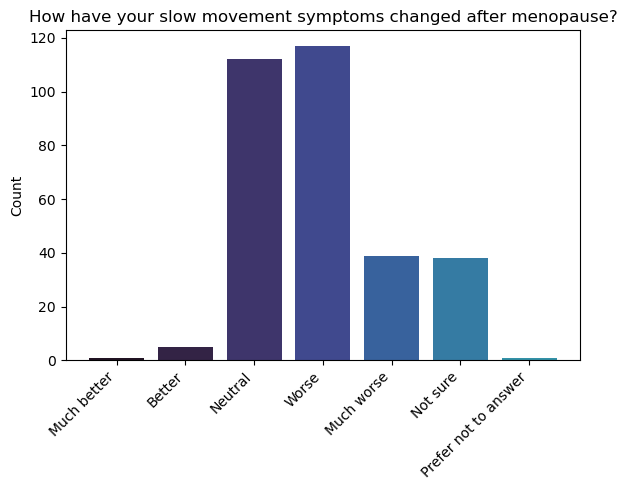

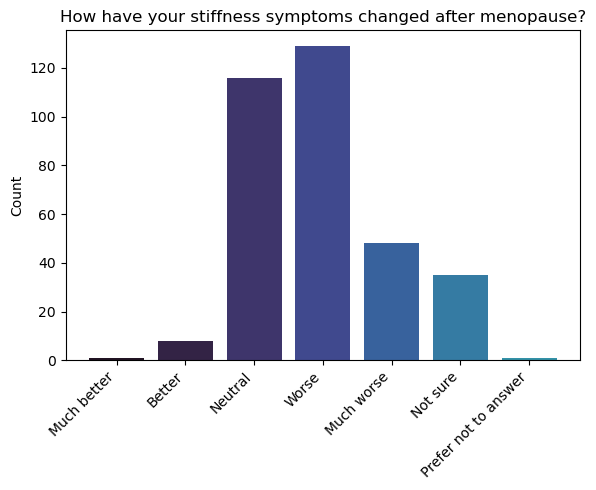

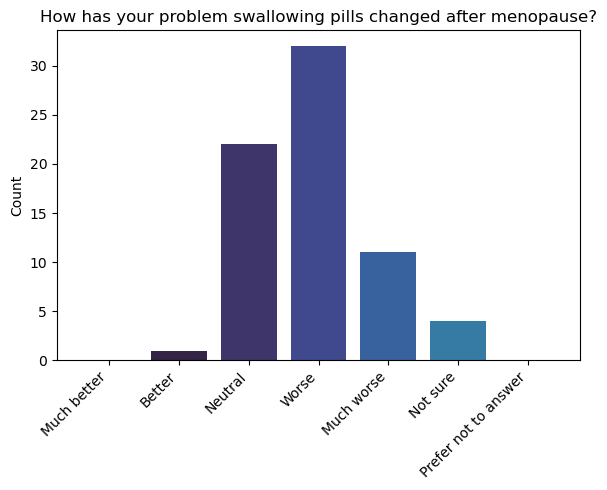

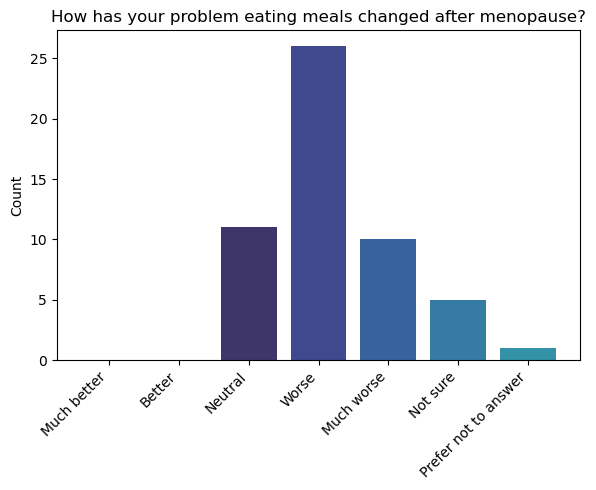

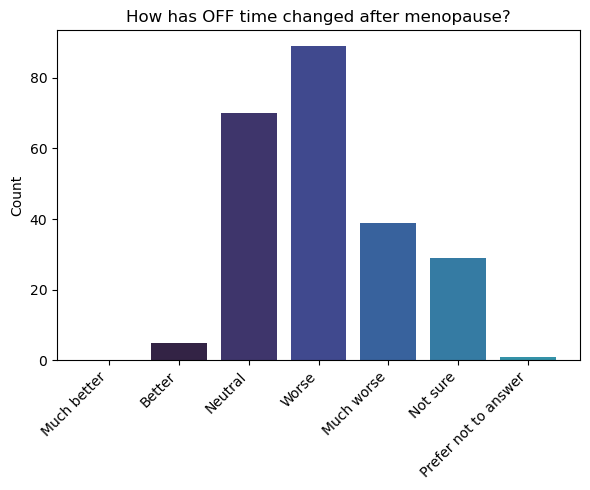

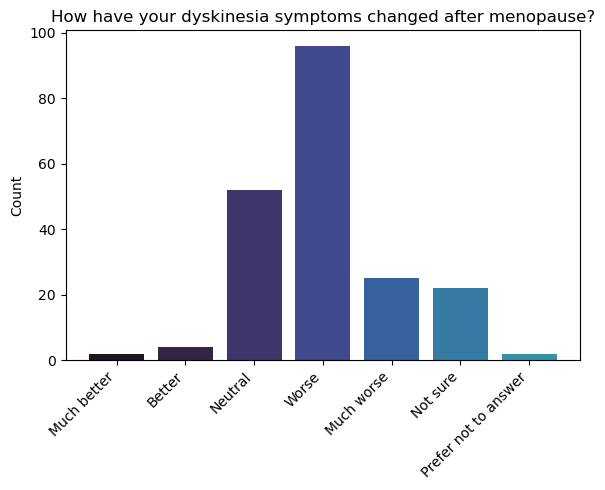

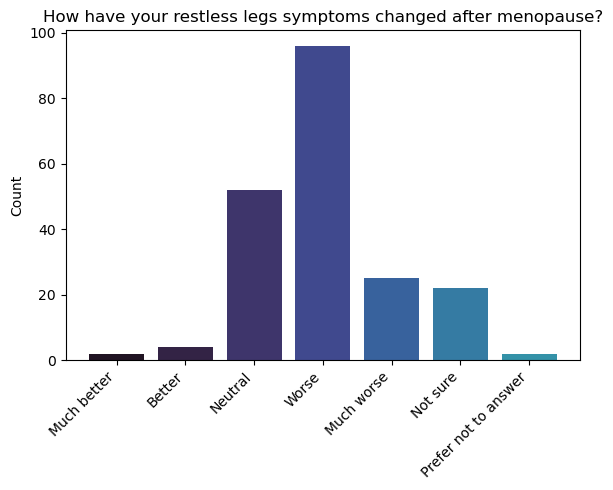

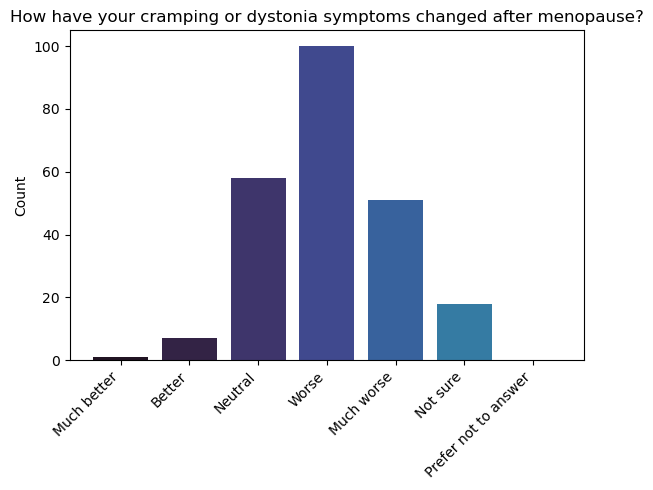

In [22]:
# How have these symptoms changed after menopause?

# Walking
walking = df.FemMenoPostPDChWalking.value_counts()

resp_key = {
    'Much better': 1.0,
    'Better': 2.0,
    'Neutral': 3.0,
    'Worse': 4.0,
    'Much worse': 5.0,
    'Not sure': 6.0,
    'Prefer not to answer': 7.0
}

walking_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        walking_plt[key] = walking[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(walking_plt.keys()), list(walking_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your walking symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Balance
balance = df.FemMenoPostPDChBalance.value_counts()

balance_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        balance_plt[key] = balance[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(balance_plt.keys()), list(balance_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your balance symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Shaking or tremor
tremor = df.FemMenoPostPDChTremor.value_counts()

tremor_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        tremor_plt[key] = tremor[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(tremor_plt.keys()), list(tremor_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your shaking or tremor symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Slow movements
mvmnts = df.FemMenoPostPDChSlowMove.value_counts()

mvmnts_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        mvmnts_plt[key] = mvmnts[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(mvmnts_plt.keys()), list(mvmnts_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your slow movement symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Stiffness
stiffness = df.FemMenoPostPDChStiff.value_counts()

stiffness_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        stiffness_plt[key] = stiffness[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(stiffness_plt.keys()), list(stiffness_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your stiffness symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Swallowing
swallowing = df.FemMenoPostPDChSwallowing.value_counts()

swallowing_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        swallowing_plt[key] = swallowing[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(swallowing_plt.keys()), list(swallowing_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has your problem swallowing pills changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Eating
eating = df.FemMenoPostPDChEating.value_counts()

eating_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        eating_plt[key] = eating[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(eating_plt.keys()), list(eating_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has your problem eating meals changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# OFF time
off_time = df.FemMenoPostPDChOFFTime.value_counts()

off_time_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        off_time_plt[key] = off_time[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(off_time_plt.keys()), list(off_time_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How has OFF time changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Dyskinesia
dyskinesia = df.FemMenoPostPDChDyskinesia.value_counts()

dyskinesia_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        dyskinesia_plt[key] = dyskinesia[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your dyskinesia symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Restless legs
restless = df.FemMenoPostPDChResLeg.value_counts()

restless_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        restless_plt[key] = restless[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(dyskinesia_plt.keys()), list(dyskinesia_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your restless legs symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Cramping and dystonia
cramping = df.FemMenoPostPDChDystonia.value_counts()

cramping_plt = {
    'Much better': 0,
    'Better': 0,
    'Neutral': 0,
    'Worse': 0,
    'Much worse': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        cramping_plt[key] = cramping[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(cramping_plt.keys()), list(cramping_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('How have your cramping or dystonia symptoms changed after menopause?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Priority #2: Do people respond differently to Parkinson’s medications before, during, and after menopause?

#### PREMENOPAUSAL: 
- Is your PD medication less effective the week before your period?
- Do you feel your PD medication is less effective during your period? 
- Is your PD medication less effective just after the end of your period? 
- Do you choose to change your PD medication to maintain function and provide relief at any time during your cycle? 

#### PERIMENOPAUSAL: 
- When you have a period, is your PD medication as effective during your period when compared to other points in your menstrual cycle?
- Has your PD medication been as effective during perimenopause compared to pre-menopause? 
- Do you choose to change your PD medication to maintain function and provide relief at any time during your cycle? 

#### POSTMENOPAUSAL: 
- No medication questions in this section 
    - OFF time, time when PD meds do not work well - how was this impacted by menopause 


## Premenopausal

Of 84 respondents who answered the question, 34 answered yes, 9 answered sometimes, 5 answered no, and 36 answered not sure.


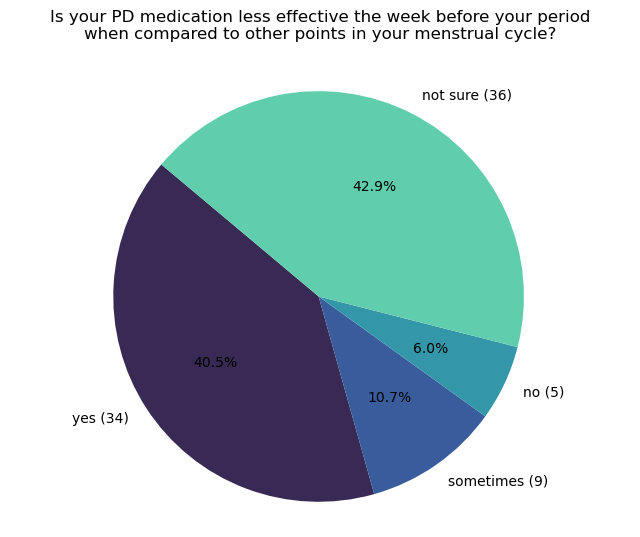

In [23]:
# Is your PD medication less effective the week before your period?
resp = df['FemMenoPreMedLessBe'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered sometimes,",
      resp[3.0],"answered no, and",
      resp[4.0],"answered not sure.")

counts = df['FemMenoPreMedLessBe'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','sometimes','no','not sure'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Is your PD medication less effective the week before your period\nwhen compared to other points in your menstrual cycle?\n')
plt.axis('equal')
plt.show()

Of 84 respondents who answered the question, 25 answered yes, 13 answered sometimes, 15 answered no, and 31 answered not sure.


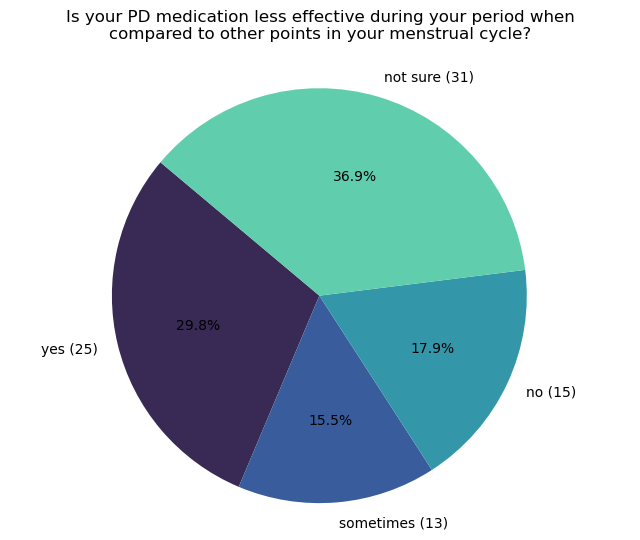

In [24]:
# Do you feel your PD medication is less effective during your period?
resp = df['FemMenoPreMedLessDur'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered sometimes,",
      resp[3.0],"answered no, and",
      resp[4.0],"answered not sure.")

counts = df['FemMenoPreMedLessDur'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','sometimes','no','not sure'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Is your PD medication less effective during your period when\ncompared to other points in your menstrual cycle?\n')
plt.axis('equal')
plt.show()

Of 84 respondents who answered the question, 3 answered yes, 10 answered sometimes, 37 answered no, and 34 answered not sure.


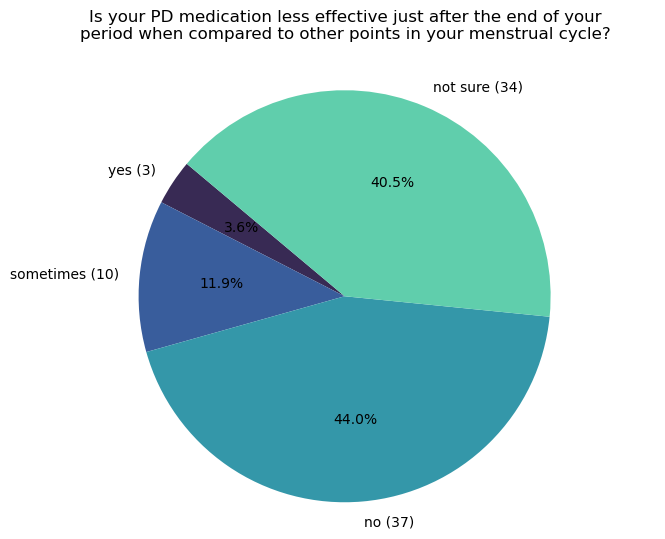

In [25]:
# Is your PD medication less effective just after the end of your period?
resp = df['FemMenoPreMedLessAf'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered sometimes,",
      resp[3.0],"answered no, and",
      resp[4.0],"answered not sure.")

counts = df['FemMenoPreMedLessAf'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','sometimes','no','not sure'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Is your PD medication less effective just after the end of your\nperiod when compared to other points in your menstrual cycle?\n')
plt.axis('equal')
plt.show()

In [26]:
df['FemMenoPreMedLessBe'].value_counts()

4.0    36
1.0    34
2.0     9
3.0     5
Name: FemMenoPreMedLessBe, dtype: int64

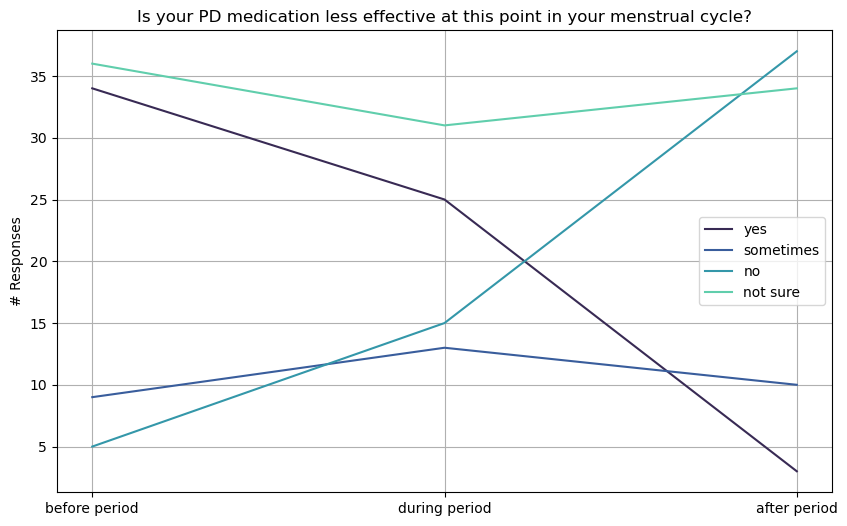

In [27]:
resp = df['FemMenoPreMedLessBe'].value_counts()
before = pd.DataFrame({'yes': resp[1.0], 'sometimes': resp[2.0], 'no': resp[3.0], 'not sure': resp[4.0]}, index=['before period'])

resp = df['FemMenoPreMedLessDur'].value_counts()
during = pd.DataFrame({'yes': resp[1.0], 'sometimes': resp[2.0], 'no': resp[3.0], 'not sure': resp[4.0]}, index=['during period'])

resp = df['FemMenoPreMedLessAf'].value_counts()
after = pd.DataFrame({'yes': resp[1.0], 'sometimes': resp[2.0], 'no': resp[3.0], 'not sure': resp[4.0]}, index=['after period'])

df_med = pd.concat([before, during, after])


plt.figure(figsize=(10, 6))
colors = sns.color_palette("mako", len(df_med.columns))
for i, col in enumerate(df_med.columns):
    plt.plot(df_med.index, df_med[col], label=col, color=colors[i])

plt.title('Is your PD medication less effective at this point in your menstrual cycle?')
plt.ylabel('# Responses')
plt.legend()
plt.grid(True)
plt.show()

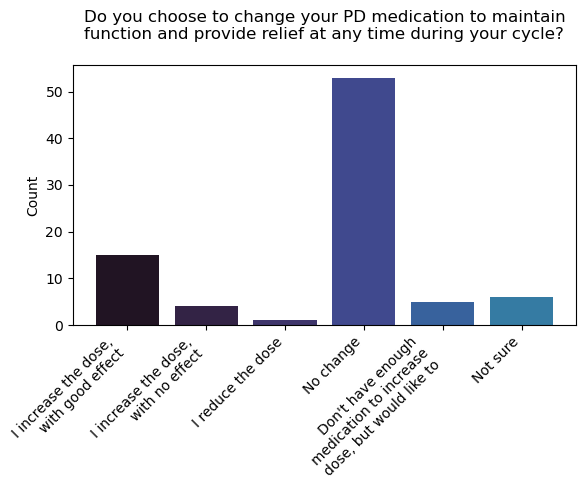

In [28]:
# Do you choose to change your PD medication to maintain function and provide relief at any time during your cycle?
change_meds = df.FemMenoPreMedChPDSymp.value_counts()

resp_key = {
    'Yes, I increase the dose, with good effect': 1.0,
    'Yes, I increase the dose, with no effect': 2.0,
    'Yes, I reduce the dose': 3.0,
    'No change': 4.0,
    'Don\'t have enough medication to increase dose, but would like to': 5.0,
    'Not sure': 6.0
}

change_meds_plt = {
    'Yes, I increase the dose, with good effect': 0,
    'Yes, I increase the dose, with no effect': 0,
    'Yes, I reduce the dose': 0,
    'No change': 0,
    'Don\'t have enough medication to increase dose, but would like to': 0,
    'Not sure': 0
}

change_meds_lbls = {
    'I increase the dose,\nwith good effect': 0,
    'I increase the dose,\nwith no effect': 0,
    'I reduce the dose': 0,
    'No change': 0,
    'Don\'t have enough\nmedication to increase\ndose, but would like to': 0,
    'Not sure': 0
}

for key, val in resp_key.items():
    try:
        change_meds_plt[key] = change_meds[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(change_meds_lbls.keys()), list(change_meds_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('Do you choose to change your PD medication to maintain\nfunction and provide relief at any time during your cycle?\n')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Perimenopausal

Of 109 respondents who answered the question, 11 answered yes, 34 answered no, 58 answered not sure, and 6 answered prefer not to answer.


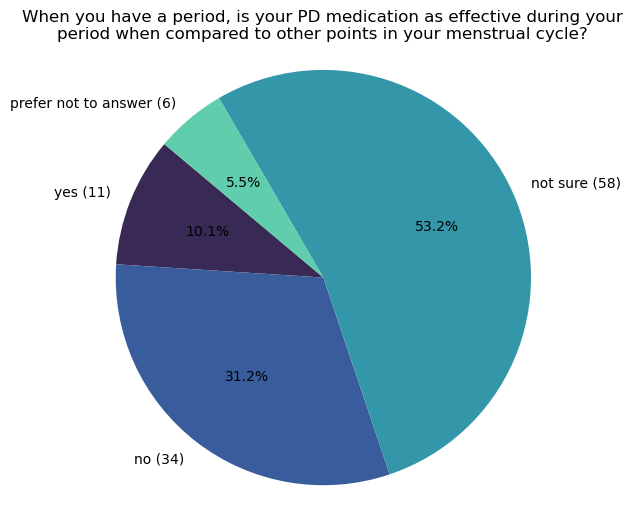

In [29]:
# When you have a period, is your PD medication as effective during your period when compared to other points in your menstrual cycle?
resp = df['FemMenoPeriMedPeriod'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered no,",
      resp[3.0],"answered not sure, and",
      resp[4.0],"answered prefer not to answer.")

counts = df['FemMenoPeriMedPeriod'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','no','not sure','prefer not to answer'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('When you have a period, is your PD medication as effective during your\nperiod when compared to other points in your menstrual cycle?')
plt.axis('equal')
plt.show()

Of 109 respondents who answered the question, 23 answered yes, 20 answered no, 64 answered not sure, and 2 answered prefer not to answer.


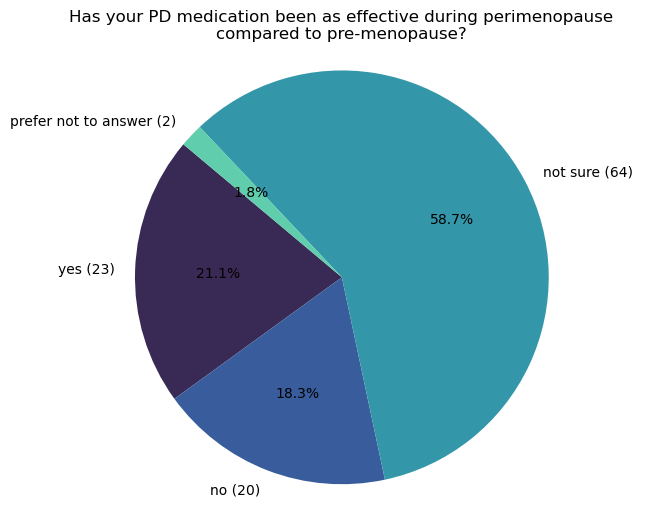

In [30]:
# Has your PD medication been as effective during perimenopause compared to pre-menopause?
resp = df['FemMenoPeriMedCompare'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered no,",
      resp[3.0],"answered not sure, and",
      resp[4.0],"answered prefer not to answer.")

counts = df['FemMenoPeriMedCompare'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','no','not sure','prefer not to answer'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Has your PD medication been as effective during perimenopause\ncompared to pre-menopause?')
plt.axis('equal')
plt.show()

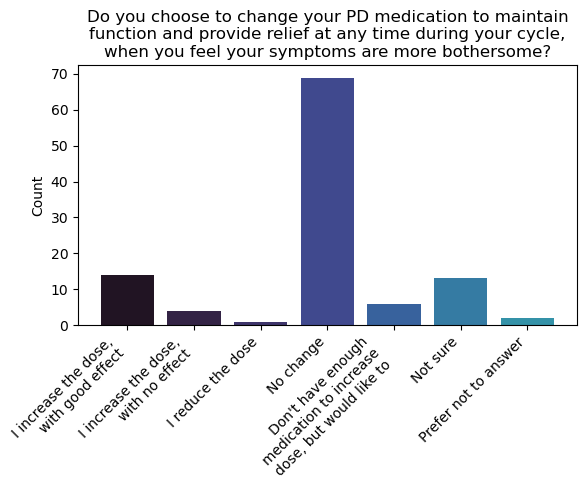

In [31]:
# Do you choose to change your PD medication to maintain function and provide relief at any time during your cycle?
change_meds = df.FemMenoPeriMedChPDSymp.value_counts()

resp_key = {
    'Yes, I increase the dose, with good effect': 1.0,
    'Yes, I increase the dose, with no effect': 2.0,
    'Yes, I reduce the dose': 3.0,
    'No change': 4.0,
    'Don\'t have enough medication to increase dose, but would like to': 5.0,
    'Not sure': 6.0,
    'Prefer not to anwer': 7.0
}

change_meds_plt = {
    'Yes, I increase the dose, with good effect': 0,
    'Yes, I increase the dose, with no effect': 0,
    'Yes, I reduce the dose': 0,
    'No change': 0,
    'Don\'t have enough medication to increase dose, but would like to': 0,
    'Not sure': 0,
    'Prefer not to anwer': 0
}

change_meds_lbls = {
    'I increase the dose,\nwith good effect': 0,
    'I increase the dose,\nwith no effect': 0,
    'I reduce the dose': 0,
    'No change': 0,
    'Don\'t have enough\nmedication to increase\ndose, but would like to': 0,
    'Not sure': 0,
    'Prefer not to answer': 0
}

for key, val in resp_key.items():
    try:
        change_meds_plt[key] = change_meds[val]
    except: continue

plt.figure(figsize=(6,5))
bars = plt.bar(list(change_meds_lbls.keys()), list(change_meds_plt.values()), color=sns.color_palette("mako", len(motor_Qs)))
plt.ylabel('Count')
plt.title('Do you choose to change your PD medication to maintain\nfunction and provide relief at any time during your cycle,\nwhen you feel your symptoms are more bothersome?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Priority #3: Female Health and Home Life Survey

- Did your Parkinson’s healthcare team ask you about your menstrual cycle and whether it affects your PD symptoms?
- Has your Parkinson’s healthcare team suggested any management for your menstrual cycle or menopausal status? 
- Are you hesitant to raise questions to your Parkinson’s healthcare team around hormones and menstruation/menopause? 
    - Please select all of the reasons. 

In [32]:
df_hh = pd.read_excel("ISP_Fox_Female_Health_and_Home_Life.xlsx")

In [33]:
print('AFAB respondents:',len(df_hh[df_hh['FemHHLSex'] == 2]))
print('AMAB respondents:',len(df_hh[df_hh['FemHHLSex'] == 1]))
print('Prefer not to answer:',len(df_hh[df_hh['FemHHLSex'] == 3]))

AFAB respondents: 3746
AMAB respondents: 237
Prefer not to answer: 4


In [34]:
print('Cis-female respondents:',len(df_hh[df_hh['FemHHLGender'] == 2]))
print('Cis-male respondents:',len(df_hh[df_hh['FemHHLGender'] == 1]))
print('Trans-feminine respondents:',len(df_hh[df_hh['FemHHLGender'] == 4]))
print('Other (gender non-conforming, genderqueer, non-binary, etc.):',len(df_hh[df_hh['FemHHLGender'] == 5]))

Cis-female respondents: 3735
Cis-male respondents: 232
Trans-feminine respondents: 5
Other (gender non-conforming, genderqueer, non-binary, etc.): 5


Of 3598 respondents who answered the question, 110 answered yes, 3304 answered no, 137 answered not sure, and 47 answered prefer not to answer.
All respondents identified as cis-women.


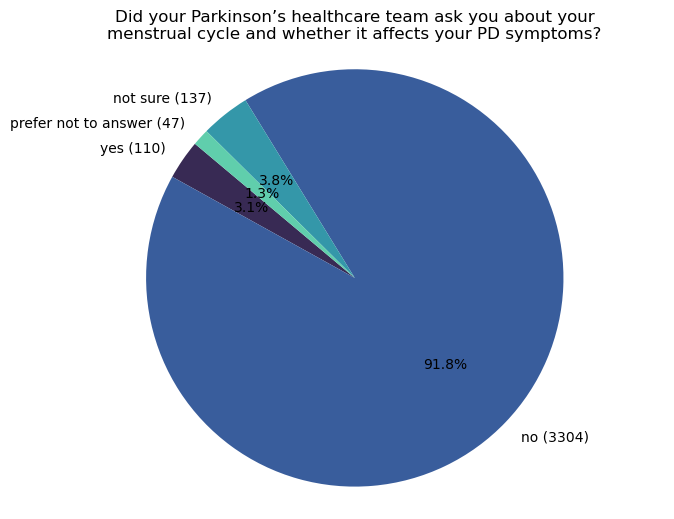

In [35]:
# Did your Parkinson’s healthcare team ask you about your menstrual cycle and whether it affects your PD symptoms?
resp = df_hh['FemHHLDrMenstAsk'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered no,",
      resp[3.0],"answered not sure, and",
      resp[4.0],"answered prefer not to answer.")
trans_fem = df_hh[(df_hh['FemHHLGender'] == 4) | (df_hh['FemHHLGender'] == 5)]
if all(np.isnan(trans_fem.FemHHLDrMenstAsk.unique())):
    print('All respondents identified as cis-women.')

counts = df_hh['FemHHLDrMenstAsk'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','no','not sure','prefer not to answer'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Did your Parkinson’s healthcare team ask you about your\nmenstrual cycle and whether it affects your PD symptoms?')
plt.axis('equal')
plt.show()

Of 3598 respondents who answered the question, 110 answered yes, 3304 answered no, 137 answered not sure, and 47 answered prefer not to answer.
All respondents identified as cis-women.


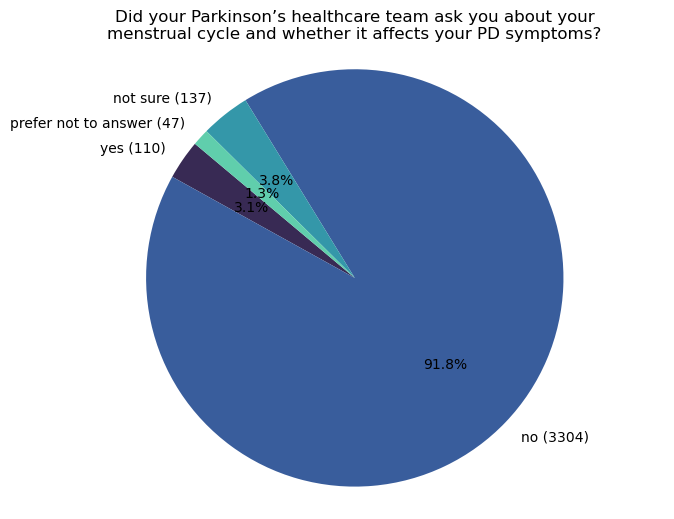

In [36]:
# Has your Parkinson’s healthcare team suggested any management for your menstrual cycle or menopausal status?
resp = df_hh['FemHHLDrMenstAsk'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered no,",
      resp[3.0],"answered not sure, and",
      resp[4.0],"answered prefer not to answer.")
trans_fem = df_hh[(df_hh['FemHHLGender'] == 4) | (df_hh['FemHHLGender'] == 5)]
if all(np.isnan(trans_fem.FemHHLDrMenstAsk.unique())):
    print('All respondents identified as cis-women.')

counts = df_hh['FemHHLDrMenstAsk'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','no','not sure','prefer not to answer'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Did your Parkinson’s healthcare team ask you about your\nmenstrual cycle and whether it affects your PD symptoms?')
plt.axis('equal')
plt.show()

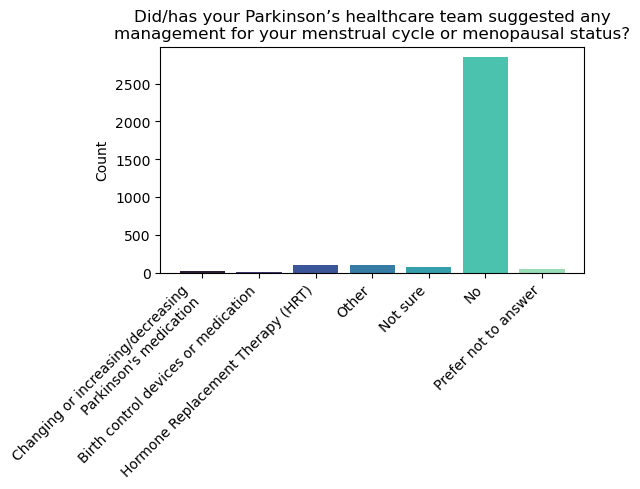

2845 (89%) of respondents answered no


In [37]:
# Did/has your Parkinson’s healthcare team suggested any management for your menstrual cycle or menopausal status?

mgmt = {
    'Changing or increasing/decreasing\nParkinson\'s medication': df_hh.FemHHLDrMenstMed.value_counts()[1.0],
    'Birth control devices or medication': df_hh.FemHHLDrMenstBirth.value_counts()[1.0],
    'Hormone Replacement Therapy (HRT)': df_hh.FemHHLDrMenstHRT.value_counts()[1.0],
    'Other': df_hh.FemHHLDrMenstOther.value_counts()[1.0],
    'Not sure': df_hh.FemHHLDrMenstNotSure.value_counts()[1.0],
    'No': df_hh.FemHHLDrMenstNo.value_counts()[1.0],
    'Prefer not to answer': df_hh.FemHHLDrMenstPTNA.value_counts()[1.0]
}

plt.figure(figsize=(6,5))
bars = plt.bar(list(mgmt.keys()), list(mgmt.values()), color=sns.color_palette("mako", len(mgmt)))
plt.ylabel('Count')
plt.title('Did/has your Parkinson’s healthcare team suggested any\nmanagement for your menstrual cycle or menopausal status?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"{df_hh.FemHHLDrMenstNo.value_counts()[1.0]} ({round(df_hh.FemHHLDrMenstNo.value_counts()[1.0]/sum(mgmt.values())*100)}%) of respondents answered no")

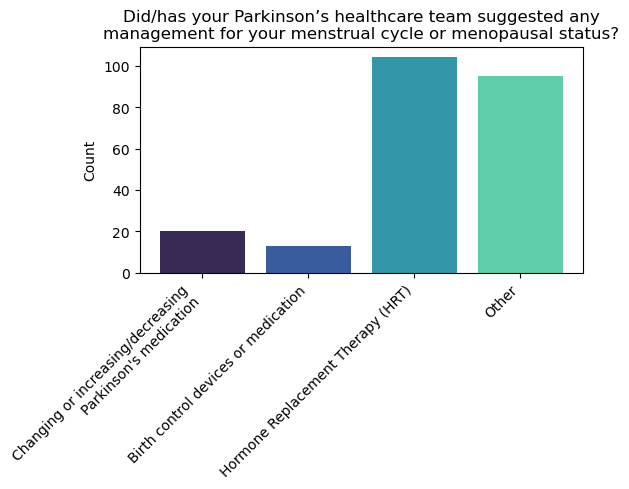

2845 (1226%) of respondents answered no


In [38]:
# of those that answered yes
mgmt = {
    'Changing or increasing/decreasing\nParkinson\'s medication': df_hh.FemHHLDrMenstMed.value_counts()[1.0],
    'Birth control devices or medication': df_hh.FemHHLDrMenstBirth.value_counts()[1.0],
    'Hormone Replacement Therapy (HRT)': df_hh.FemHHLDrMenstHRT.value_counts()[1.0],
    'Other': df_hh.FemHHLDrMenstOther.value_counts()[1.0],
}

plt.figure(figsize=(6,5))
bars = plt.bar(list(mgmt.keys()), list(mgmt.values()), color=sns.color_palette("mako", len(mgmt)))
plt.ylabel('Count')
plt.title('Did/has your Parkinson’s healthcare team suggested any\nmanagement for your menstrual cycle or menopausal status?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"{df_hh.FemHHLDrMenstNo.value_counts()[1.0]} ({round(df_hh.FemHHLDrMenstNo.value_counts()[1.0]/sum(mgmt.values())*100)}%) of respondents answered no")

Of 3617 respondents who answered the question, 196 answered yes, 3162 answered no, 204 answered not sure, and 55 answered prefer not to answer.


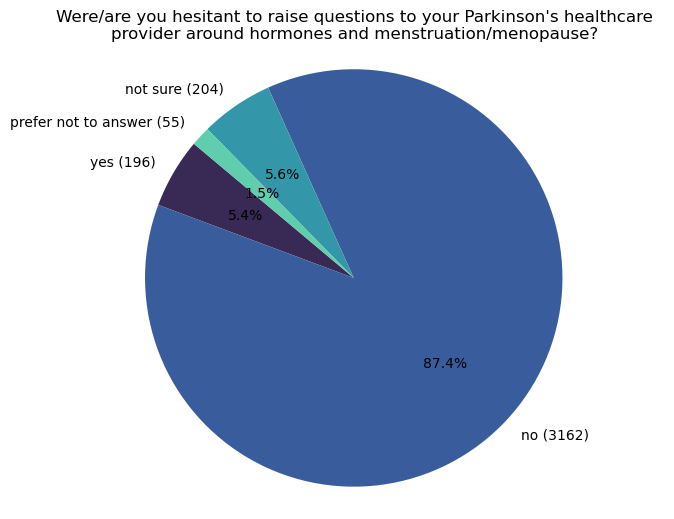

In [39]:
# Are you hesitant to raise questions to your Parkinson’s healthcare team around hormones and menstruation/menopause?
resp = df_hh['FemHHLDrHormHesitant'].value_counts()
print("Of",resp.sum(),"respondents who answered the question,",
      resp[1.0],"answered yes,",
      resp[2.0],"answered no,",
      resp[3.0],"answered not sure, and",
      resp[4.0],"answered prefer not to answer.")

counts = df_hh['FemHHLDrHormHesitant'].value_counts()
counts = [counts[1.0],counts[2.0],counts[3.0],counts[4.0]]
colors = sns.color_palette("mako", len(counts))
plt.figure(figsize=(8, 6))
labels = [f'{label} ({count})' for label, count in zip(['yes','no','not sure','prefer not to answer'], counts)]
plt.pie(counts, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors)
plt.title('Were/are you hesitant to raise questions to your Parkinson\'s healthcare\nprovider around hormones and menstruation/menopause?')
plt.axis('equal')
plt.show()

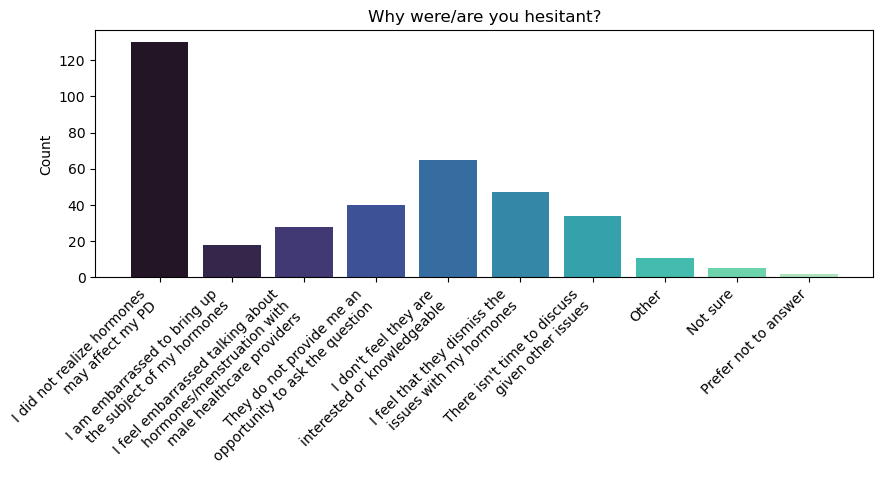

In [40]:
# Why were/are you hesitant?

mgmt = {
    'I did not realize hormones\nmay affect my PD': df_hh.FemHHLDrHormAffect.value_counts()[1.0],
    'I am embarrassed to bring up\nthe subject of my hormones': df_hh.FemHHLDrHormEmbarass.value_counts()[1.0],
    'I feel embarrassed talking about\nhormones/menstruation with\nmale healthcare providers': df_hh.FemHHLDrHormMale.value_counts()[1.0],
    'They do not provide me an\nopportunity to ask the question': df_hh.FemHHLDrHormNoOpp.value_counts()[1.0],
    'I don\'t feel they are\ninterested or knowledgeable': df_hh.FemHHLDrHormNoKnow.value_counts()[1.0],
    'I feel that they dismiss the\nissues with my hormones': df_hh.FemHHLDrHormDismiss.value_counts()[1.0],
    'There isn\'t time to discuss\ngiven other issues': df_hh.FemHHLDrHormNoTime.value_counts()[1.0],
    'Other': df_hh.FemHHLDrHormOther.value_counts()[1.0],
    'Not sure': df_hh.FemHHLDrHormNotSure.value_counts()[1.0],
    'Prefer not to answer': df_hh.FemHHLDrHormPTNA.value_counts()[1.0],
}

plt.figure(figsize=(9,5))
bars = plt.bar(list(mgmt.keys()), list(mgmt.values()), color=sns.color_palette("mako", len(mgmt)))
plt.ylabel('Count')
plt.title('Why were/are you hesitant?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()